In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer #transform different types

# Loading datasets into dataframe

In [2]:
year_2005 = pd.read_csv("2005.csv") 
year_2006 = pd.read_csv("2006.csv")
year_2007 = pd.read_csv("2007.csv")
plane = pd.read_csv("plane-data.csv")
airports = pd.read_csv("airports.csv")
carriers = pd.read_csv("carriers.csv")
variables = pd.read_csv("variable-descriptions.csv")

# Combing chosen three years into one dataframe

In [4]:
df = pd.concat([year_2005, year_2006, year_2007])

# Question 1


## When is the best time of day, day of the week, and time of year to fly to minimise delays?

### Day of the Week

#### Finding the average departure delay by day of week

In [5]:
depdelay_day = df.groupby(by = "DayOfWeek").mean()['DepDelay']
depdelay_day = depdelay_day.reset_index() 

#### Finding the average arrival delay by day of week

In [6]:
arrdelay_day = df.groupby(by = "DayOfWeek").mean()['ArrDelay']
arrdelay_day = arrdelay_day.reset_index()

#### Merging the two dataframe into one 

In [8]:
delay_day = pd.merge(depdelay_day, arrdelay_day, on = "DayOfWeek")

#### Finding the total average delay by airlines

In [9]:
delay_day["AvgDelay"] = (delay_day["DepDelay"] + delay_day["ArrDelay"])/2

#### Coverting the name of the days 

In [10]:
days = {1:'Mon', 2:'Tues', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat', 7:'Sun'}
delay_day["Days"] = delay_day["DayOfWeek"].map(days)

#### Plotting the graph 

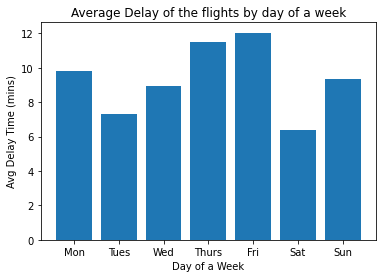

In [11]:
plt.bar(delay_day['Days'], delay_day['AvgDelay'])
plt.title('Average Delay of the flights by day of a week')
plt.xlabel('Day of a Week')
plt.ylabel('Avg Delay Time (mins)')
plt.show()

### Month of the year

#### Finding departure delay by month of a year

In [12]:
depdelay_month = df.groupby(by = "Month").mean()['DepDelay']
depdelay_month = depdelay_month.reset_index()

#### Finding arrival delay by month of a year

In [13]:
arrdelay_month = df.groupby(by = "Month").mean()['ArrDelay']
arrdelay_month = arrdelay_month.reset_index()

#### Combining the two dataframes into one

In [14]:
delay_month = pd.merge(depdelay_month, arrdelay_month, on = "Month")

#### Finding the total average delay by airlines 

In [15]:
delay_month["AvgDelay_month"] = (delay_month['DepDelay'] + delay_month['ArrDelay'])/2

#### Coverting the names of the months

In [16]:
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
delay_month["Months"] = delay_month["Month"].map(months)

#### Plotting the graph

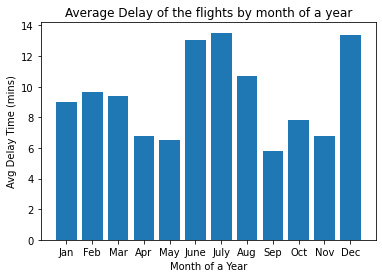

In [17]:
plt.bar(delay_month['Months'], delay_month['AvgDelay_month'])
plt.title('Average Delay of the flights by month of a year')
plt.xlabel('Month of a Year')
plt.ylabel('Avg Delay Time (mins)')
plt.show()

### Time of the day

#### Selecting the DepTime and ArrDelay columns from original dataframe

In [18]:
df_time = df[['DepTime', 'ArrDelay']]
df_time = df_time.dropna()

#### Floor dividing the departure time (DepTime) by 100

In [19]:
df_time['DepTime'] = df_time['DepTime'].floordiv(100)

#### Finding the average arrival delay and removing the irrelevant rows and sorting the values of arrival delay in ascending orders

In [20]:
delay_time = df_time.groupby(by = 'DepTime').mean()['ArrDelay']
delay_time = delay_time.reset_index()
delay_time = delay_time.drop([24,25,26,27,28,29])
delay_time = delay_time.sort_values(by='ArrDelay', ascending=True)

#### Plotting the graph

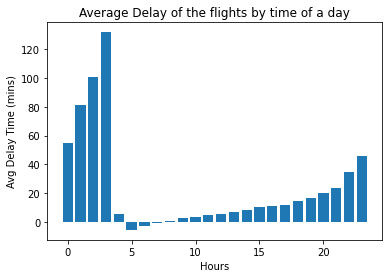

In [21]:
plt.bar(delay_time['DepTime'], delay_time['ArrDelay'])
plt.title('Average Delay of the flights by time of a day')
plt.xlabel('Hours')
plt.ylabel('Avg Delay Time (mins)')
plt.show() 

# Question 2

## Do older planes suffer more delays?

#### Renaming the one of the columns, unnecessary columns, irrelevant rows in plane dataframe

In [22]:
plane = plane.rename(columns={'tailnum': 'TailNum'})
plane = plane.drop(plane.columns[[1,2,3,4,5,6,7]], axis = 1) 
plane = plane.iloc[34:]
plane = plane.reset_index()
plane = plane.drop(plane.columns[[0]], axis = 1) 

#### Merging the plane dataframe and original dataframe by TailNum variable 

In [23]:
plane_data = df.merge(plane, on = 'TailNum')

#### Filtering the columns which is not equal to zero, removing the NA valus in year variable

In [24]:
plane_filter = plane_data[plane_data["TailNum"] != 0]
plane_remove = plane_filter.dropna(subset = ['year']) 
plane_remove = plane_remove.reset_index()

#### Finding the average arrival delay and choosing the relevant rows

In [25]:
year_arrdelay = plane_remove.groupby(by = 'year').mean()['ArrDelay']
year_arrdelay = year_arrdelay.reset_index()
year_arrdelay = year_arrdelay.iloc[1:49]

#### Plotting the graph

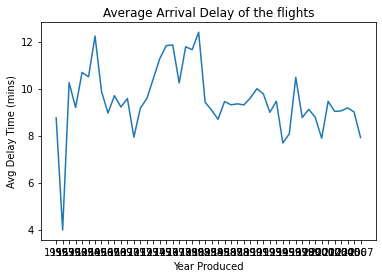

In [26]:
plt.plot(year_arrdelay['year'], year_arrdelay['ArrDelay'])
plt.title('Average Arrival Delay of the flights')
plt.xlabel('Year Produced')
plt.ylabel('Avg Delay Time (mins)')
plt.show()

#### Finding the average departure delay and choosing the relevant rows

In [27]:
year_depdelay = plane_remove.groupby(by = 'year').mean()['DepDelay']
year_depdelay = year_depdelay.reset_index()
year_depdelay = year_depdelay.iloc[1:49]

#### Plotting the graph

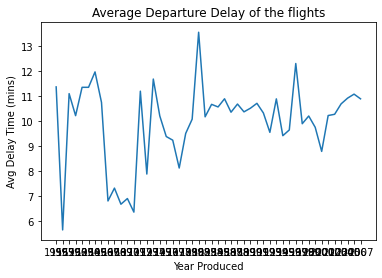

In [28]:
plt.plot(year_depdelay['year'], year_depdelay['DepDelay'])
plt.title('Average Departure Delay of the flights')
plt.xlabel('Year Produced')
plt.ylabel('Avg Delay Time (mins)')
plt.show()

# Question 3


## How does the number of people flying between different locations change over time?

#### Counting the number of airlines (carriers) by month and year 

In [29]:
airline_count = df.groupby(['Month', 'Year']).count()['UniqueCarrier']
airline_count = airline_count.reset_index()

#### Coverting the names of the months

In [30]:
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
airline_count["Months"] = airline_count["Month"].map(months)

#### Plotting the graph

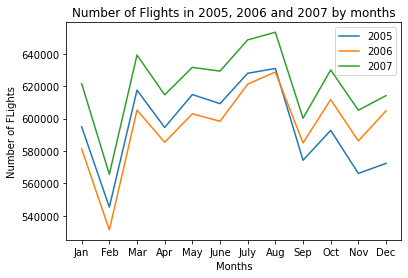

In [31]:
Years = set(airline_count['Year'])
plt.figure()
for years in Years:
    selected_data = airline_count.loc[airline_count['Year'] == years]
    plt.plot(selected_data['Months'], selected_data['UniqueCarrier'], label = years)
plt.title('Number of Flights in 2005, 2006 and 2007 by months')
plt.xlabel('Months')
plt.ylabel('Number of FLights')
plt.legend()
plt.show()

#### Finding the sum of distance travelled by carriers 

In [32]:
sum_distance = df.groupby(['Month', 'Year']).sum()['Distance']
sum_distance = sum_distance.reset_index()

#### Coverting the names of the months

In [33]:
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
sum_distance["Months"] = sum_distance["Month"].map(months)

#### Plotting the graph

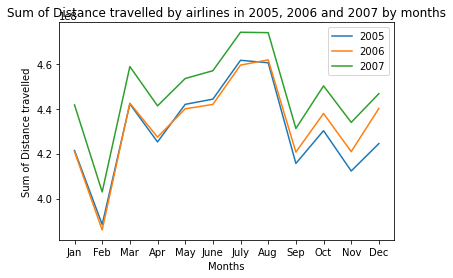

In [36]:
Years_distance = set(sum_distance['Year'])
plt.figure()
for years_distance in Years_distance:
    selected_distance = sum_distance.loc[sum_distance['Year'] == years_distance]
    plt.plot(selected_distance['Months'], selected_distance['Distance'], label = years_distance)
plt.title('Sum of Distance travelled by airlines in 2005, 2006 and 2007 by months')
plt.xlabel('Months')
plt.ylabel('Sum of Distance travelled')
plt.legend()
plt.show() 

# Question 4

## Can you detect cascading failures as delays in one airport create delays in others?

#### Finding the values of 'DepDelay' which is greater than zero (Finding the departure delay)


In [42]:
dep = df[df['DepDelay'] > 0]
dep.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,NaN,0,0,0,0,0,0
5,2005,1,3,1,2042.0,1900,9.0,2232,UA,542,...,3,47,0,NaN,0,23,0,0,0,74
6,2005,1,4,2,2046.0,1900,2357.0,2232,UA,542,...,5,26,0,NaN,0,46,0,0,0,39
8,2005,1,6,4,2110.0,1900,8.0,2223,UA,542,...,2,15,0,NaN,0,16,0,0,0,89
11,2005,1,10,1,1917.0,1900,2240.0,2223,UA,542,...,3,24,0,NaN,0,17,0,0,0,0


#### Finding the values of 'ArrDelay' which is greater than zero and less than zero

In [43]:
arr1 = dep[dep['ArrDelay'] > 0]
arr2 = dep[dep['ArrDelay'] < 0]
arr1.head()
arr2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
53,2005,1,27,4,1711.0,1705,1900.0,1902,UA,543,...,15,17,0,NaN,0,0,0,0,0,0
54,2005,1,28,5,1706.0,1705,1843.0,1902,UA,543,...,4,21,0,NaN,0,0,0,0,0,0
76,2005,1,25,2,2002.0,1950,2244.0,2250,UA,543,...,4,18,0,NaN,0,0,0,0,0,0
92,2005,1,10,1,2054.0,2045,2343.0,2359,UA,544,...,2,10,0,NaN,0,0,0,0,0,0
99,2005,1,17,1,2051.0,2045,2356.0,2359,UA,544,...,4,19,0,NaN,0,0,0,0,0,0


#### Finding the values which causes arrival delay and do not cause arrival delay when there is departure delay

In [39]:
failure1 = (len(arr1)/len(dep)) 
failure2 = (len(arr2)/len(dep))
print(failure1)
print(failure2)

0.7814956636613766
0.19018914405059512


#### Rounding off the values 

In [40]:
failure1 = round(failure1, 4)
failure2 = round(failure2, 4)
print(failure1)
print(failure2)

0.7815
0.1902


#### Finding the percentage values in two decimal place 

In [41]:
failure1 = format(failure1, '.2%')
failure2 = format(failure2, '.2%')
print(failure1)
print(failure2)

78.15%
19.02%


# Question 5

## Use the available variables to construct a model that predicts delays.

### 1. Extend the results with more variables

#### Setting the sample size 

In [45]:
df = df.sample(frac=0.005, replace=True, random_state=1)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
5033322,2007,9,11,2,1009.0,1010,1114.0,1120,WN,633,...,2,8,0,NaN,0,0,0,0,0,0
6388099,2006,11,11,6,1235.0,1235,1354.0,1405,OH,5013,...,6,22,0,NaN,0,0,0,0,0,0
1091412,2007,2,20,2,2055.0,2045,31.0,35,AA,1346,...,3,14,0,NaN,0,0,0,0,0,0
7336573,2007,12,22,6,1424.0,1355,1701.0,1645,AA,749,...,7,15,0,NaN,0,0,11,0,0,5
2631549,2007,5,8,2,821.0,822,949.0,940,OO,6374,...,4,19,0,NaN,0,0,0,0,0,0


### Pipelines: Pre-Processing

In [46]:
r_df = df[['Month', 'DayofMonth', 'DepDelay', 'ArrDelay', 'Distance', 'NASDelay', 'CarrierDelay', 'SecurityDelay',
           'ActualElapsedTime', 'CRSElapsedTime', 'WeatherDelay', 'LateAircraftDelay']]

r_df = r_df.dropna()

X = r_df.drop('ArrDelay', axis = 1)

y = r_df['ArrDelay']
y = y.to_frame()
y.loc[y["ArrDelay"] > 0, "ArrDelay"] = 1
y.loc[y["ArrDelay"] < 0, "ArrDelay"] = 0

numerical_features = ['Month', 'DayofMonth', 'DepDelay', 'Distance', 'NASDelay', 'CarrierDelay', 'SecurityDelay',
           'ActualElapsedTime', 'CRSElapsedTime', 'WeatherDelay', 'LateAircraftDelay']

In [51]:
# Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features)])

### Create the test and training sets

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1)

### Set the parameters

In [54]:
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median']
}

### Extend the results: Logistic Regression

In [55]:
pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=100, penalty = 'none'))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train, y_train.values.ravel());

### Extend the results: Gradient Boosting

In [56]:
pipe_gdb = Pipeline(steps=[('data_transformer', data_transformer),
       ('pipe_gdb',GradientBoostingClassifier(random_state=2))])

grid_gdb = GridSearchCV(pipe_gdb, param_grid=param_grid)
grid_gdb.fit(X_train, y_train.values.ravel());

### 2. Extend the results with other classification methods
The following classification methods are mentioned but not yet demonstrated:

. Penalised logistic regression
. Classification trees
. Random forests

### Penalised logistic regression

In [57]:
pipe_plr = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_plr', LogisticRegression(penalty='l1', max_iter=100, tol=0.01, solver='saga'))])
grid_plr = GridSearchCV(pipe_plr, param_grid=param_grid)
grid_plr.fit(X_train, y_train.values.ravel());

### Classification tree

In [58]:
pipe_tree = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_tree', DecisionTreeClassifier(random_state=0))])
grid_tree = GridSearchCV(pipe_tree, param_grid=param_grid)
grid_tree.fit(X_train, y_train.values.ravel());

### Random forests

In [59]:
pipe_rf = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_rf', RandomForestClassifier(random_state=0))])
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid)
grid_rf.fit(X_train, y_train.values.ravel());

### Compare the performance of the classification models by the ROC curve

/Users/zwelinhtet/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/zwelinhtet/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/zwelinhtet/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plo

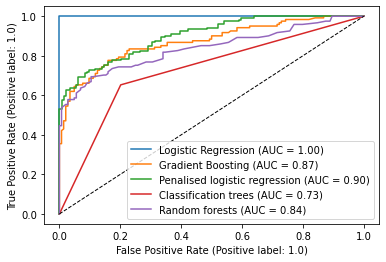

In [60]:
ax = plt.gca()
plot_roc_curve(grid_lr, X_test, y_test, ax=ax, name='Logistic Regression')
plot_roc_curve(grid_gdb, X_test, y_test, ax=ax, name='Gradient Boosting')
plot_roc_curve(grid_plr, X_test, y_test, ax=ax, name='Penalised logistic regression')
plot_roc_curve(grid_tree, X_test, y_test, ax=ax, name='Classification trees')
plot_roc_curve(grid_rf, X_test, y_test, ax=ax, name='Random forests')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.show()

## Finding the correlation of some of the variables 

In [61]:
airline = pd.concat([year_2005, year_2006, year_2007])

### Choosing the variables that we want to know the correlation 

In [62]:
airline = airline[['Year', 'Month', 'DayofMonth', 'DepDelay', 'ArrDelay', 'Distance', 'NASDelay', 'CarrierDelay', 'SecurityDelay',
           'ActualElapsedTime', 'CRSElapsedTime', 'WeatherDelay', 'LateAircraftDelay']]

### Drawing heatmap to show the correlation of the variables 

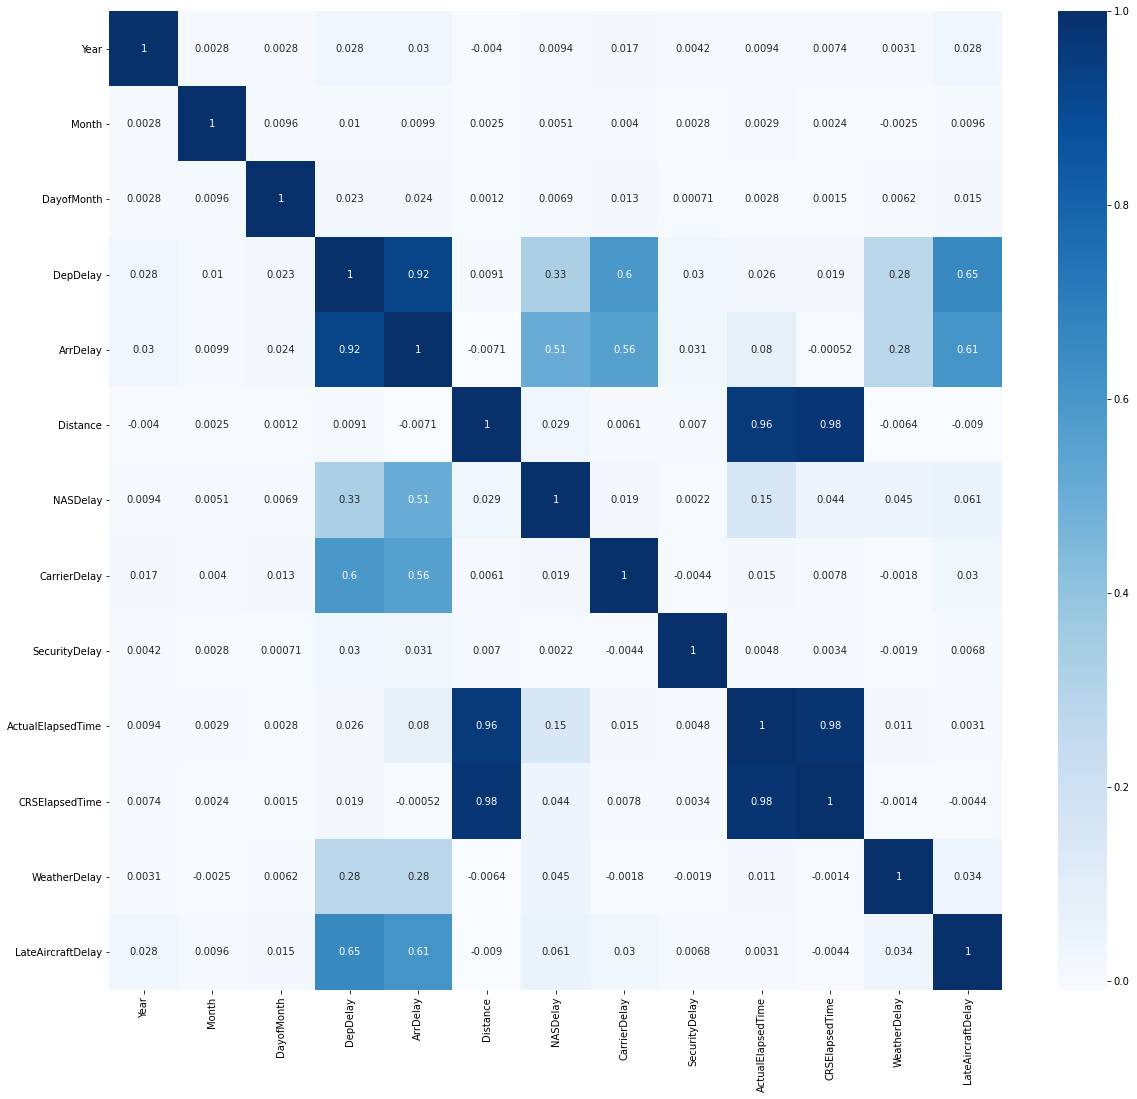

In [63]:
airline_sample = airline.sample(frac=0.005)
plt.figure(figsize=(20,18))
corrMatrix = airline_sample.corr()
sns.heatmap(corrMatrix, annot = True, cmap = plt.cm.Blues)
plt.show()